In [85]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import opendatasets as od
from PIL import Image
import pandas as pd

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [86]:
od.download("https://www.kaggle.com/datasets/pcbreviglieri/pneumonia-xray-images?select=train")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  gonzajl


Your Kaggle Key:

  ········


100%|██████████| 1.14G/1.14G [00:18<00:00, 66.6MB/s]


In [87]:
od.download("https://www.kaggle.com/datasets/vivek468/beginner-chest-xray-image-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  gonzajl


Your Kaggle Key:

  ········


100%|██████████| 2.08G/2.08G [00:30<00:00, 73.2MB/s]


In [90]:
!mkdir dataset
!mkdir dataset/neumonia
!mkdir dataset/no-neumonia

!mv ./beginner-chest-xray-image-classification/chest_xray/pred/NORMAL/* ./dataset/no-neumonia
!mv ./beginner-chest-xray-image-classification/chest_xray/test/NORMAL/* ./dataset/no-neumonia
!mv ./beginner-chest-xray-image-classification/chest_xray/train/NORMAL/* ./dataset/no-neumonia

!mv ./beginner-chest-xray-image-classification/chest_xray/pred/PNEUMONIA/* ./dataset/neumonia
!mv ./beginner-chest-xray-image-classification/chest_xray/test/PNEUMONIA/* ./dataset/neumonia
!mv ./beginner-chest-xray-image-classification/chest_xray/train/PNEUMONIA/* ./dataset/neumonia

!mv ./pneumonia-xray-images/test/normal/* ./dataset/no-neumonia
!mv ./pneumonia-xray-images/train/normal/* ./dataset/no-neumonia
!mv ./pneumonia-xray-images/val/normal/* ./dataset/no-neumonia

!mv ./pneumonia-xray-images/test/opacity/* ./dataset/neumonia
!mv ./pneumonia-xray-images/train/opacity/* ./dataset/neumonia
!mv ./pneumonia-xray-images/val/opacity/* ./dataset/neumonia

In [91]:
def es_imagen(archivo):
    return archivo.endswith(('.jpg', '.jpeg', '.png'))

In [92]:
def refinar_imagenes(ruta_carpeta, tamaño_imagenes):
    for archivo in os.listdir(ruta_carpeta):
        if es_imagen(archivo):

            # Leemos la imagen
            ruta_imagen = os.path.join(ruta_carpeta, archivo)
            imagen = cv2.imread(ruta_imagen)
            
            # Le cambiamos el tamaño
            imagen = cv2.resize(imagen, (tamaño_imagenes, tamaño_imagenes))
            imagen = imagen.reshape(tamaño_imagenes, tamaño_imagenes, 3)

            # Guardamos la imagen
            cv2.imwrite(ruta_imagen, imagen)

In [93]:
refinar_imagenes("./dataset/neumonia", 224)
refinar_imagenes("./dataset/no-neumonia", 224)

In [94]:
def agregar_filas(filas, ruta_carpeta, etiquetas):
    for archivo in os.listdir(ruta_carpeta):
        if es_imagen(archivo):
            ruta_imagen = os.path.join(ruta_carpeta, archivo)
            fila = {"imagen": ruta_imagen, "neumonia": etiquetas[0], "no_neumonia": etiquetas[1]}
            filas.append(fila)

In [101]:
filas = []
agregar_filas(filas, "dataset/neumonia", [1, 0])
agregar_filas(filas, "dataset/no-neumonia", [0, 1])

columnas = ["imagen", "neumonia", "no_neumonia"]

# Crea el DataFrame con las filas y nombres de columnas
df = pd.DataFrame(filas, columns=columnas)
df = df.sample(frac=1)
df = df.sample(frac=1)
df = df.sample(frac=1)

# Exporta el DataFrame en un archivo CSV
df.to_csv("./dataset/datos.csv", index=False)

In [102]:
def mostrar_grafico_clases(datos):
    cant_neumonia = (datos["neumonia"] == 1).sum()
    cant_no_neumonia = (datos["no_neumonia"] == 1).sum()

    categorias = ["neumonia", "no_neumonia"]
    cantidades = [cant_neumonia, cant_no_neumonia]

    plt.figure(figsize=(6, 4))
    barras = plt.bar(categorias, cantidades)

    for bar, cantidad in zip(barras, cantidades):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() / 2 - 550, str(cantidad), fontsize=12)

    plt.xlabel("Clases")
    plt.ylabel("Cantidad de Imágenes")
    plt.title("Cantidad de Imágenes por Clase")

    plt.show()

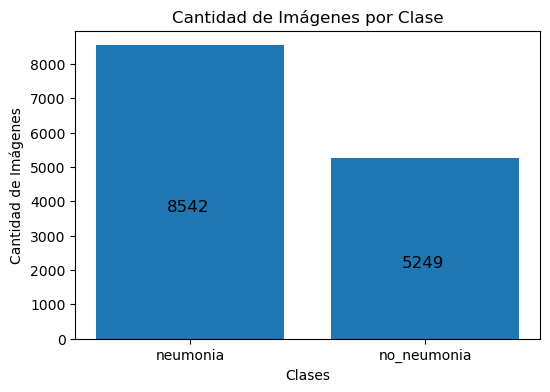

In [103]:
mostrar_grafico_clases(df)

In [104]:
cant_imagenes = 5249

df_neumonia = df[df.neumonia == 1][:cant_imagenes]
df_no_neumonia = df[df.no_neumonia == 1][:cant_imagenes]

archivos_a_eliminar = pd.concat([df[df.neumonia == 1][cant_imagenes:], df[df.no_neumonia == 1][cant_imagenes:]])
archivos_a_eliminar = archivos_a_eliminar["imagen"]

# Concatena los DataFrames filtrados
df = pd.concat([df_neumonia, df_no_neumonia])

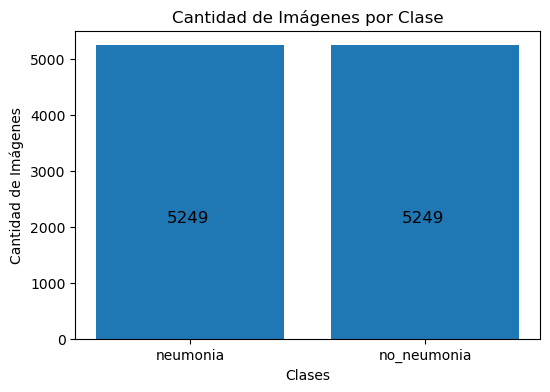

In [105]:
mostrar_grafico_clases(df)

In [106]:
archivos_a_eliminar

6575    dataset/neumonia/person1155_bacteria_3100.jpeg
596               dataset/neumonia/PNEUMONIA_1100.jpeg
922          dataset/neumonia/person140_virus_284.jpeg
4475     dataset/neumonia/person343_bacteria_1584.jpeg
6162         dataset/neumonia/person354_virus_729.jpeg
                             ...                      
6170      dataset/neumonia/person127_bacteria_603.jpeg
7074               dataset/neumonia/PNEUMONIA_848.jpeg
4709         dataset/neumonia/person326_virus_675.jpeg
542               dataset/neumonia/PNEUMONIA_3114.jpeg
6056              dataset/neumonia/PNEUMONIA_1554.jpeg
Name: imagen, Length: 3293, dtype: object

In [107]:
for archivo in archivos_a_eliminar:
    os.remove(archivo)

In [108]:
print(len(os.listdir("./dataset/neumonia")))
print(len(os.listdir("./dataset/no-neumonia")))

5249
5249
